In [5]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

** Part 1 **

In [6]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

** Part 2 ** 

In [7]:
data['variety'] = iris.target
del data['petal length (cm)']
del data['petal width (cm)']

** Part 3 **

In [151]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2)

In [152]:
y_train, y_test = data_train['variety'], data_test['variety']

In [153]:
del data_train['variety']
del data_test['variety']

** Part 4 **

In [154]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [155]:
lda.fit(data_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [156]:
lda.predict(data_test)

array([2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 2, 0])

In [157]:
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T

In [158]:
from sklearn.metrics import accuracy_score

In [159]:
accuracy_score(y_test.values, lda.predict(data_test))

0.9

** Part 5 **

In [160]:
lda.means_

array([[5.02142857, 3.42619048],
       [6.02222222, 2.81111111],
       [6.57142857, 2.98809524]])

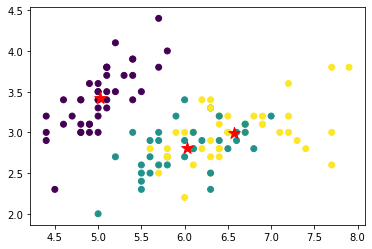

In [161]:
plt.scatter(data_train['sepal length (cm)'], data_train['sepal width (cm)'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

** Part 6 **

In [8]:
data1 = data.copy()
del data1['variety']

** Part 7 ** 

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [9]:
scaler = StandardScaler()
data1_scaled = scaler.fit_transform(data1)

In [10]:
k_inertia = []
ks = range(1,16)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data1_scaled)
    k_inertia.append(clf_kmeans.inertia_)

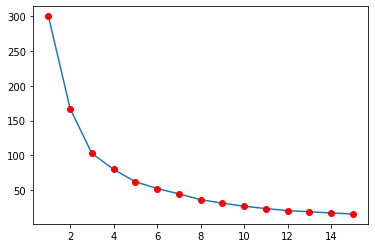

In [11]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

** Построим кластеризацию для 3, 4, 6 и 8 кластеров **

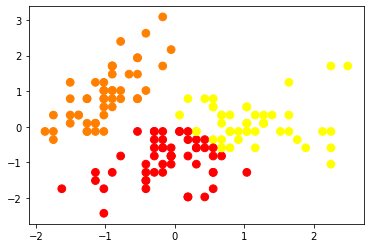

In [15]:
kmeans3 = KMeans(n_clusters=3)
clusters = kmeans3.fit_predict(data1_scaled)
plt.scatter(data1_scaled[:, 0], data1_scaled[:, 1],cmap='autumn', c=clusters, s=60)

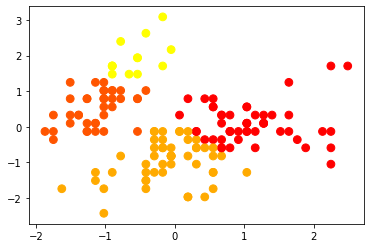

In [24]:
kmeans4 = KMeans(n_clusters=4)
clusters = kmeans4.fit_predict(data1_scaled)
plt.scatter(data1_scaled[:, 0], data1_scaled[:, 1],cmap='autumn', c=clusters, s=60)

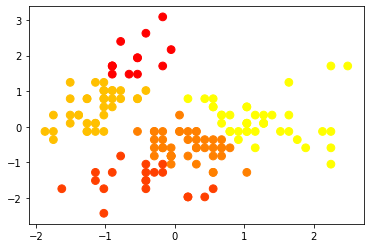

In [26]:
kmeans5 = KMeans(n_clusters=5)
clusters = kmeans5.fit_predict(data1_scaled)
plt.scatter(data1_scaled[:, 0], data1_scaled[:, 1],cmap='autumn', c=clusters, s=60)

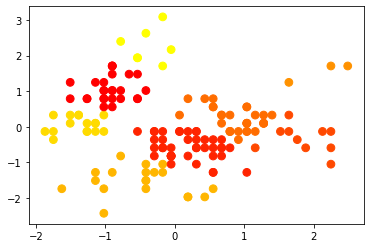

In [17]:
kmeans8 = KMeans(n_clusters=8)
clusters = kmeans8.fit_predict(data1_scaled)
plt.scatter(data1_scaled[:, 0], data1_scaled[:, 1],cmap='autumn', c=clusters, s=60)

** С ростом количества кластеров происходит деление кластеров, но "хвосты" плохо схлопываются в кластера. Поэтому считаю, что оптимальное количество кластеров = 4. Но это при условии не принятия во внимание входящего условия про 3 класса цветков **